In [29]:
import games
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.pool import Pool

# np.random.seed(50)

population = 100
num_generations = 150
num_simulations = 100
cost_benefit_ratio = 0.3
cooperation_threshold = int(1)
group_split_threshold = 10
group_split_method = 'equal'
group_split_probabilistic = False

num_groups = [1, 5, 10, 20, 50]

sd_args = [[population, ng, num_generations, cost_benefit_ratio, cooperation_threshold, group_split_threshold, 
         group_split_method, group_split_probabilistic, 'snowdrift'] for ng in num_groups]
pd_args = [[population, ng, num_generations, cost_benefit_ratio, cooperation_threshold, group_split_threshold, 
         group_split_method, group_split_probabilistic, 'prisoners dilemma'] for ng in num_groups]
args = sd_args + pd_args

with Pool() as pool:
    all_results = pool.starmap(games.group_split_game_many, [[num_simulations] + arg for arg in args])


In [30]:

population_per_gen = [[variant[j][3] for j in range(num_simulations)] for variant in all_results]
mean_population_per_gen = np.mean(population_per_gen, axis=1)
std_population_per_gen = np.std(population_per_gen, axis=1)

cooperation_per_gen = [[variant[j][4] for j in range(num_simulations)] for variant in all_results]
mean_cooperation_per_gen = np.mean(cooperation_per_gen, axis=1)
std_cooperation_per_gen = np.std(cooperation_per_gen, axis=1)

total_reward_per_gen = [[variant[j][5] for j in range(num_simulations)] for variant in all_results]
mean_total_reward_per_gen = np.mean(total_reward_per_gen, axis=1)
std_total_reward_per_gen = np.std(total_reward_per_gen, axis=1)


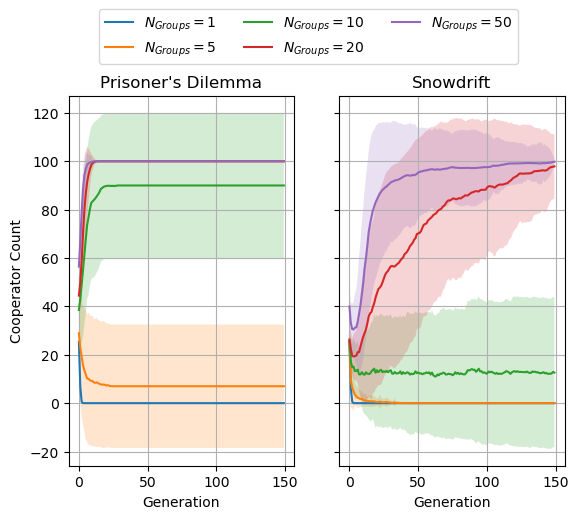

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(6.4, 4.8))

for j in range(len(pd_args)):
    i = j + len(sd_args)
    ax1.plot(mean_cooperation_per_gen[i], label='')
    ax1.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
ax1.set(title="Prisoner's Dilemma", xlabel='Generation', ylabel='Cooperator Count')
ax1.grid()

for i in range(len(sd_args)):
    ax2.plot(mean_cooperation_per_gen[i], label=f'$N_{{Groups}} = {num_groups[i]}$')
    ax2.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
ax2.set(title='Snowdrift', xlabel='Generation')
ax2.grid()

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.075), ncol=3)

plt.savefig("..\\figures\\var_split_method_equal.png", bbox_inches='tight', transparent=True)
plt.show()
